In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

bbm_tweets_df = pd.read_csv("bbm_tweets_oct4-9.csv")
leni_tweets_df = pd.read_csv("leni_tweets_oct4-9.csv")

Text(0.5, 1.0, 'Tweet Count Per Category')

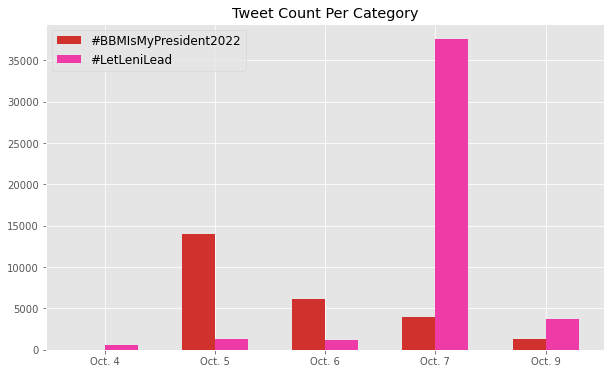

In [95]:
date_bbm = pd.DatetimeIndex(bbm_tweets_df["Datetime"]).day.value_counts().sort_index()
date_leni = pd.DatetimeIndex(leni_tweets_df["Datetime"]).day.value_counts().sort_index()

xaxis = np.arange(5)

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(xaxis, date_bbm, width=0.3, color="#D0312D", label="#BBMIsMyPresident2022")
ax.bar(xaxis+0.3, date_leni, width=0.3, color="#ef3ba7", label="#LetLeniLead")
ax.set_xticks(xaxis+0.3/2)
ax.set_xticklabels(["Oct. 4", "Oct. 5", "Oct. 6", "Oct. 7", "Oct. 9"])
ax.legend(prop={"size": 12})
ax.set_title("Tweet Count Per Category")

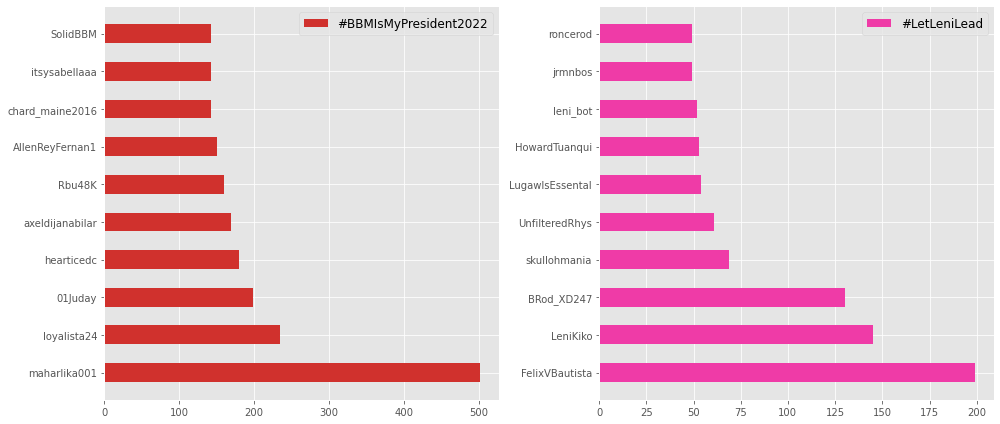

In [90]:
user_bbm = bbm_tweets_df["Username"].value_counts().head(10)
user_leni = leni_tweets_df["Username"].value_counts().head(10)

fig, axes = plt.subplots(1,2,figsize=(14,6))

axes[0].barh(user_bbm.index, user_bbm, height=0.5, color="#D0312D", label="#BBMIsMyPresident2022")
axes[0].legend(prop={"size": 12})
axes[1].barh(user_leni.index, user_leni, height=0.5, color="#ef3ba7", label="#LetLeniLead")
axes[1].legend(prop={"size": 12})
#axes[1].set_xlim(0,530)

ax.set_title("#BBMIsMyPresident2022 vs. #LetLeniLead2022 Tweets from Oct. 4-9")
fig.tight_layout() 

# take note of the x axis, both are not the same

Text(0.5, 1.0, 'Account Creation of 20,000 Randomly Sampled Users Per Category')

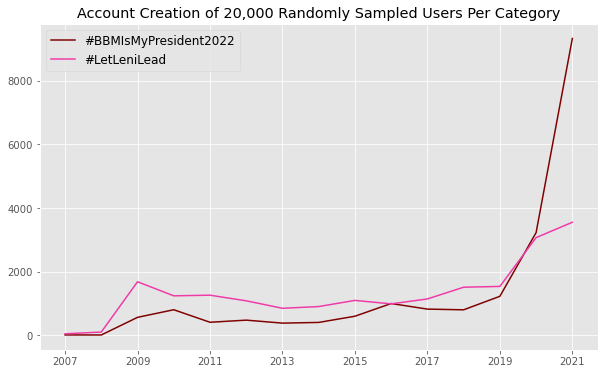

In [92]:
creation_bbm = pd.DatetimeIndex(bbm_tweets_df["AccountCreated"].sample(20000)).year.value_counts().sort_index()
creation_leni = pd.DatetimeIndex(leni_tweets_df["AccountCreated"].sample(20000)).year.value_counts().sort_index()

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.plot(creation_bbm, color="#800000", label="#BBMIsMyPresident2022")
ax.plot(creation_leni, color="#ef3ba7", label="#LetLeniLead")
plt.legend(prop={"size": 12})
plt.xticks([2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021])
ax.set_title("Account Creation of 20,000 Randomly Sampled Users Per Category")

In [87]:
axes[1].set_xticks?

Object `set_xticks` not found.


In [ ]:
axes[1].set_xticks